# Inheritance

Inheritance is a fundamental concept in object-oriented programming (OOP) languages like Python. It allows a class (called the child class or subclass) to inherit attributes and methods from another class (called the parent class or superclass). This promotes code reuse and establishes a hierarchical relationship between classes.

In [2]:
class ParentClass:
    pass
    # Parent class attributes and methods

class ChildClass(ParentClass):
    pass
    # Child class inherits from ParentClass
    # Child class can add new attributes and methods or override existing ones

## **Example of Inheritance**

In [3]:
# Parent class
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        raise NotImplementedError("Subclass must implement abstract method")

# Child class inheriting from Animal
class Dog(Animal):
    def speak(self):
        return f"{self.name} says Woof!"

class Cat(Animal):
    def speak(self):
        return f"{self.name} says Meow!"

# Usage
dog = Dog("Buddy")
print(dog.speak())  # Output: Buddy says Woof!

cat = Cat("Whiskers")
print(cat.speak())  # Output: Whiskers says Meow!

Buddy says Woof!
Whiskers says Meow!


## Types of Inheritance

### 1. Single Inheritance

In single inheritance, a single subclass extends from a single superclass.

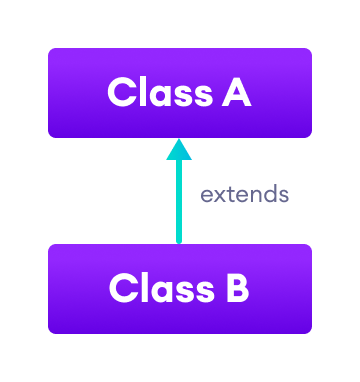

In [4]:
class Animal:
    def __init__(self, name):
        print("Inside Animal constructor")
        self.name = name

    def speak(self):
        raise NotImplementedError("Subclass must implement abstract method")
    
    def eat(self):
        return f"{self.name} is eating."


In [6]:
class Dog(Animal):
    def speak(self):
        return f"{self.name} says Woof!"
    
    def fetch(self):
        return f"{self.name} is fetching the ball."


In [9]:
# Create an instance of Dog
my_dog = Dog("Buddy")
# since dog class has not constructor so parent class constructor is called.

# Call methods from both the parent and child class
print(my_dog.eat())     # Output: Buddy is eating.
print(my_dog.speak())   # Output: Buddy says Woof!
print(my_dog.fetch())   # Output: Buddy is fetching the ball.
print(my_dog.name)

Inside Animal constructor
Buddy is eating.
Buddy says Woof!
Buddy is fetching the ball.
Buddy


### 2. Multilevel Inheritance

In multilevel inheritance, a subclass extends from a superclass and then the same subclass acts as a superclass for another class.

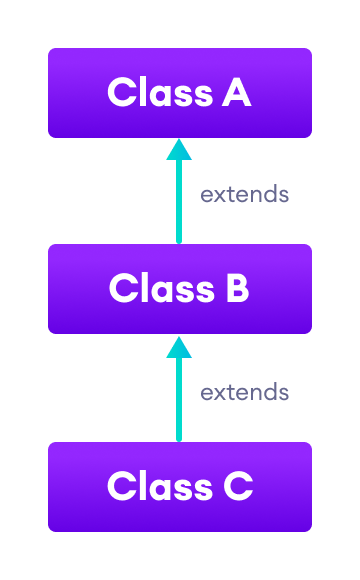

In [13]:
class Animal:
    def __init__(self, name):
        self.name = name
        print("Inside Animal class constructor")

    def eat(self):
        return f"{self.name} is eating."

In [14]:
class Mammal(Animal):
    def __init__(self, name, fur_color):
        super().__init__(name)
        self.fur_color = fur_color
        print("Inside Mammal class constructor")

    def describe(self):
        return f"{self.name} has {self.fur_color} fur."

In [15]:
class Dog(Mammal):
    def speak(self):
        return f"{self.name} says Woof!"

    def fetch(self):
        return f"{self.name} is fetching the ball."

In [16]:
# Create an instance of Dog
my_dog = Dog("Buddy", "brown")

# Call methods from all levels of the inheritance hierarchy
print(my_dog.eat())        # Output: Buddy is eating.
print(my_dog.describe())   # Output: Buddy has brown fur.
print(my_dog.speak())      # Output: Buddy says Woof!
print(my_dog.fetch())      # Output: Buddy is fetching the ball.

Inside Animal class constructor
Inside Mammal class constructor
Buddy is eating.
Buddy has brown fur.
Buddy says Woof!
Buddy is fetching the ball.


### 3. Multiple Inheritance

Multiple inheritance in Python allows a class to inherit attributes and methods from more than one parent class.

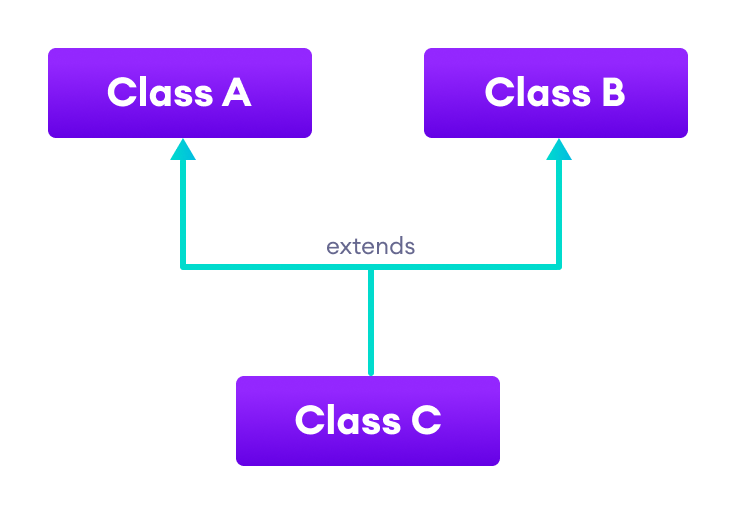

In [17]:
class Flyer:
    def fly(self):
        return "Flying high!"

class Swimmer:
    def swim(self):
        return "Swimming in the water!"

In [18]:
class Duck(Flyer, Swimmer):
    def quack(self):
        return "Quack! Quack!"

In [19]:
# Create an instance of Duck
my_duck = Duck()

# Call methods from all parent classes and the child class
print(my_duck.fly())    # Output: Flying high!
print(my_duck.swim())   # Output: Swimming in the water!
print(my_duck.quack())  # Output: Quack! Quack!

Flying high!
Swimming in the water!
Quack! Quack!


#### Diamond Problem

When a child class is inherits the properties from more than one parents and the methods for the parents are same (Method name and parameters are exactly the same) then child gets confused about which method will be called. This problem is called the Diamond problem.

MRO (Method Resolution Order): Python uses the C3 linearization algorithm to determine the order in which methods should be resolved in a consistent and predictable manner.


**Consider as it goes from left to right**(give more prefrance to left one) and then moves to top. (like bottom to down bfs)

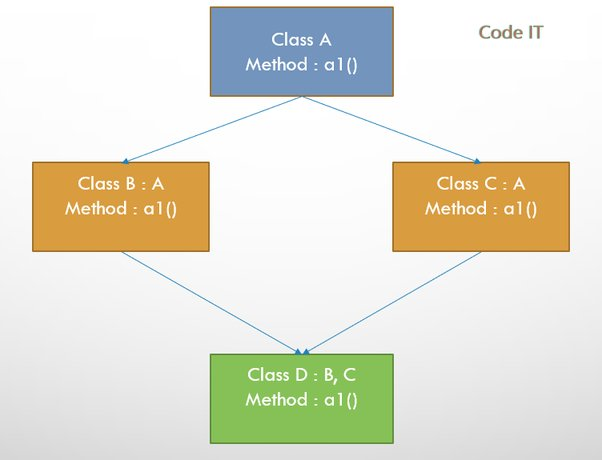

In [24]:
class A:
    def method(self):
        print("Method from A")

class B(A):
    def method(self):
        print("Method from B")

class C(A):
    def method(self):
        print("Method from C")

class D(B, C):
    pass

d = D()
d.method()
print(D.mro())

Method from B
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


So the mro seach for method() function in this order : D->B->C-A

**This Example is Intersting**

In [25]:
class A:
    def __init__(self):
        print("Initializing A")

    def method(self):
        print("Method from A")

class B(A):
    def __init__(self):
        super().__init__()
        print("Initializing B")

class C(A):
    def __init__(self):
        super().__init__()
        print("Initializing C")

class D(B, C):
    def __init__(self):
        super().__init__()
        print("Initializing D")

d = D()
print(D.mro())

Initializing A
Initializing C
Initializing B
Initializing D
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


Here's what happens step by step:

D.__init__() calls super().__init__(), which refers to B.__init__() because B comes first in the MRO after D.
B.__init__() calls super().__init__(), which refers to C.__init__() because C is next in the MRO.
C.__init__() calls super().__init__(), which refers to A.__init__() because A is next in the MRO.

### 4. hierarchical inheritance

In hierarchical inheritance, multiple subclasses extend from a single superclass.

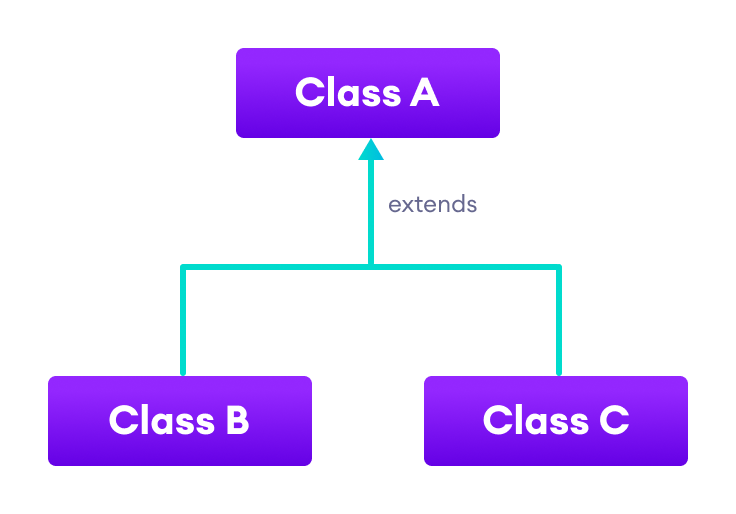

In [26]:
class Animal:
    def __init__(self, name):
        self.name = name

    def eat(self):
        return f"{self.name} is eating."


In [27]:
class Dog(Animal):
    def bark(self):
        return f"{self.name} says Woof!"

class Cat(Animal):
    def meow(self):
        return f"{self.name} says Meow!"


In [28]:
# Create an instance of Dog
my_dog = Dog("Buddy")
print(my_dog.eat())     # Output: Buddy is eating.
print(my_dog.bark())    # Output: Buddy says Woof!

# Create an instance of Cat
my_cat = Cat("Whiskers")
print(my_cat.eat())     # Output: Whiskers is eating.
print(my_cat.meow())    # Output: Whiskers says Meow!


Buddy is eating.
Buddy says Woof!
Whiskers is eating.
Whiskers says Meow!


### 5. Hybrid Inheritance

It is a combination of multiple inheritance and hierarichal inheritance.

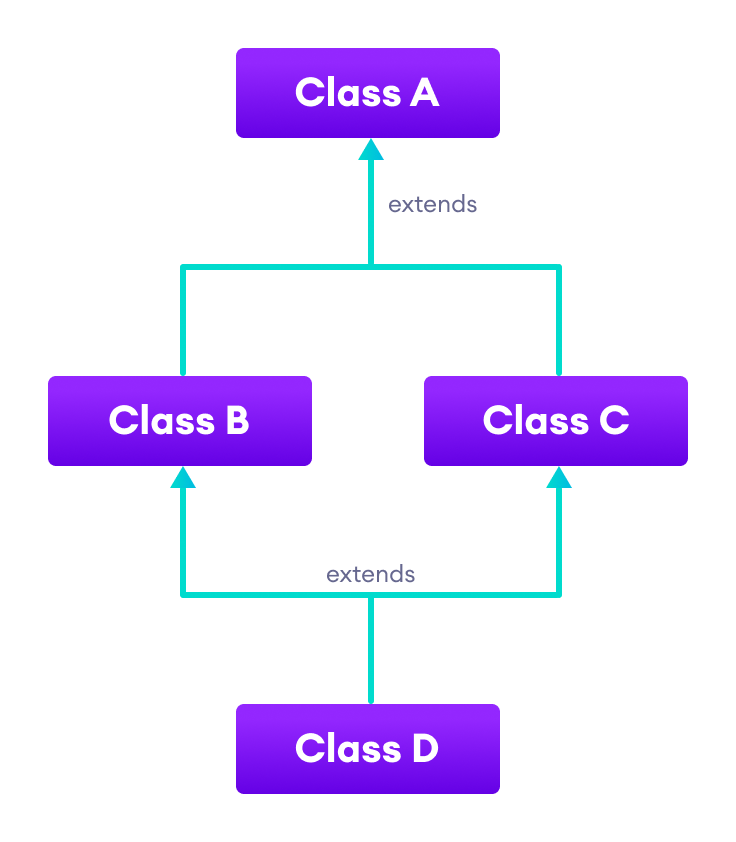

In [30]:
class A:
    def method(self):
        print("Method from A")

class B(A):
    def method(self):
        print("Method from B")

class C(A):
    def method(self):
        print("Method from C")

class D(B, C):
    pass

d = D()
d.method()
print(D.mro())

Method from B
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
